In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 13s 0us/step


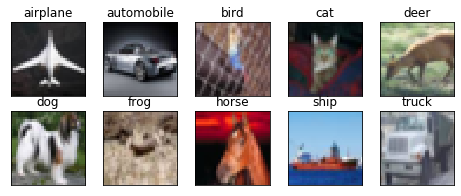

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [10]:
# Define the model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras import regularizers
from keras import activations

model = Sequential()
model.add(SeparableConv2D(48, 3, 3, input_shape=(32, 32, 3), activation='relu',border_mode='same'))  #32 3x3 
#model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(48, 3, 3, activation='relu'))    #30 5x5 
#model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(MaxPooling2D(pool_size=(2, 2)))   #15  6x6 
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(96, 3, 3, activation='relu',border_mode='same'))  #15 10x10
#model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(96, 3, 3, activation='relu'))   #13  14x14
#model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(MaxPooling2D(pool_size=(2, 2)))   #6  16x16
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(192, 3, 3, activation='relu',border_mode='same')) #6 24x24
#model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(SeparableConv2D(192, 3, 3, activation='relu'))    #4 32x32                      
#model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(MaxPooling2D(pool_size=(2, 2)))  #2  
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Flatten())
#model.add(Dense(512))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(256))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
#model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3), activation="relu", padding="same")`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3), activation="relu")`


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)       

Train on 50000 samples, validate on 10000 samples
Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
50000/50000 [==============================] - 24s 476us/step - loss: 0.7325 - acc: 0.7643 - val_loss: 0.6596 - val_acc: 0.7800
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
50000/50000 [==============================] - 23s 458us/step - loss: 0.4444 - acc: 0.8431 - val_loss: 0.6759 - val_acc: 0.7790
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
50000/50000 [==============================] - 23s 468us/step - loss: 0.3845 - acc: 0.8620 - val_loss: 0.6386 - val_acc: 0.7985
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
50000/50000 [==============================] - 23s 468us/step - loss: 0.3408 - acc: 0.8774 - val_loss: 0.6142 - val_acc: 0.8026
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
50000/50000 [==

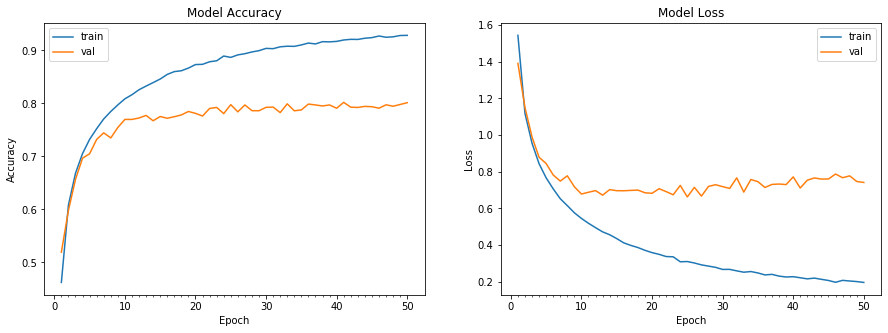

Accuracy on test data is: 82.49


In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

# train the model
start = time.time()
# Train the model
model.fit(train_features, train_labels, batch_size = 64,epochs=50,verbose=1,validation_data= (test_features, test_labels),callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))